In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set()

In [2]:
from multiproduct import generate_dataset

In [3]:
nodes_sizes = [5, 10, 15, 20, 30, 50, 70, 100]
levels_sizes = [3, 3, 3, 4, 4, 5, 5, 5]
item_sizes = [1, 3, 5, 7]
datasets = []
for nodes, levels in zip(nodes_sizes, levels_sizes):
    for items in item_sizes:
        n_nodes, supplies, demands, costs, capacities = generate_dataset(
                nodes=nodes, levels=levels, total_supplies=[400]*items, 
                total_demands=[500]*items, transp_costs=(100,1000), 
                random_state=42)        
        datasets.append({
            'nodes': nodes,
            'items': items,
            'n_nodes': n_nodes, 
            'supplies': supplies, 
            'demands': demands, 
            'costs': costs, 
            'capacities': capacities
        })

In [37]:
import pickle
with open('datasets/datasets.pkl', 'wb') as f:
    pickle.dump(datasets, f, protocol=pickle.HIGHEST_PROTOCOL)

In [3]:
import pickle
with open('datasets/datasets.pkl', 'rb') as f:
    datasets = pickle.load(f)

In [35]:
datasets[0]

{'nodes': 5,
 'items': 1,
 'n_nodes': [1, 1, 3],
 'supplies': [[400, 100]],
 'demands': [[190, 110, 200, 0]],
 'costs': [array([[761]]), array([[408, 869, 443]])],
 'capacities': [[400], [558], [190, 110, 200]]}

In [5]:
import time
import numpy as np
from multiproduct import run_singleobjective_GA

In [7]:
%%time
logs_200 = []
times_200 = []
n_runs = 2
for dataset in datasets:
    print(f'{dataset["nodes"]} nodes {dataset["items"]} items: |', end=' ')
    runs_logs = []
    runs_times = []
    for run in range(n_runs):
        start = time.time()
        _, _, log = run_singleobjective_GA(dataset['n_nodes'], dataset['supplies'],
                            dataset['demands'], dataset['costs'],
                            dataset['capacities'], pop_size=100, n_generations=200,
                            n_solutions=20, crossover_p=0.5, mutation_p=0.2,
                            early_stopping_rounds=20, verbose=False)
        end = time.time()
        runs_logs.append(log)
        runs_times.append(end-start)
    print(f'Avg time: {np.mean(runs_times):.4f}s Best opt value: {np.min([log[-1]["Min"] for log in runs_logs])}')
    logs_200.append(runs_logs)
    times_200.append(runs_times)
# 0.5893 3.7086 4.4684 11.0034 3.7167

5 nodes 1 items: | Avg time: 0.5008s Best opt value: 499292.64462809917
5 nodes 3 items: | Avg time: 1.6394s Best opt value: 1703631.2032923158
5 nodes 5 items: | Avg time: 1.3073s Best opt value: 2959872.225660088
5 nodes 7 items: | Avg time: 4.7645s Best opt value: 2869135.7301461985
10 nodes 1 items: | Avg time: 1.7151s Best opt value: 384201.46280991734
10 nodes 3 items: | Avg time: 10.6975s Best opt value: 721174.4290351742
10 nodes 5 items: | Avg time: 24.6065s Best opt value: 1901199.165108921
10 nodes 7 items: | Avg time: 32.1230s Best opt value: 2618728.4322659965
15 nodes 1 items: | Avg time: 0.9267s Best opt value: 251046.19473140495
15 nodes 3 items: | Avg time: 8.7820s Best opt value: 820388.962150453
15 nodes 5 items: | Avg time: 20.4261s Best opt value: 1183565.3915852234
15 nodes 7 items: | Avg time: 21.5736s Best opt value: 1767543.469272685
20 nodes 1 items: | Avg time: 2.1347s Best opt value: 443748.4242882338
20 nodes 3 items: | Avg time: 20.5780s Best opt value: 10

In [8]:
import pickle
with open('datasets/logs_200.pkl', 'wb') as f:
    pickle.dump(logs_200, f, protocol=pickle.HIGHEST_PROTOCOL)

In [9]:
import pickle
with open('datasets/times_200.pkl', 'wb') as f:
    pickle.dump(times_200, f, protocol=pickle.HIGHEST_PROTOCOL)

## Test

In [10]:
lp_times = [0.008683, 0.11762, 0.004097, 0.01498, 
           0.093507, 1.23846, 5.69253, 73.3217,
           0.086584, 6.48149, 36.03, 64.24,
           0.950327, 34.89, 59.12, 76.82,
           2.57049, 88.29, 196.91, 318.64,
           16.565, 285.00, 525.62, 1130.16,
           48.3724, 733.61, 1312.68, 1939.96,
           288.70, 2045.12, 4887.99, 14018.52]
lp_opts = [499292.64, 1703631.203292316, 2959872.2, 2868928.135578291,
          380800.3966942149, 699857.4897937207, 1922668.411017489, 2499959.2,
          242676.1158587367, 873510.9743251393, 1134136.7, 1862396.7,
          418605.8909045099, 1096563.1, 1995369.1, 2491801,
          422356.7763972118, 1126224.3, 1580413.7, 2417517,
          392256.9256482316, 998924.96, 1574122.5, 2463475.4,
          342532.3847513397, 995572.95, 1606624.1, 2251286.2,
          338277.44, 921732.25, 1585387.9, 2310516.7]

In [66]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
items_3 = results[results['# Bienes']==3]

In [79]:
nodos_3 = items_3.index
opt_times3 = items_3['Tiempo de ejecución de Couenne']
ga_times3 = items_3['Tiempo de ejecución del Algoritmo Genético']

In [81]:
import scipy

In [85]:
val,_ = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  opt_times3.index,  opt_times3)

/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [86]:
val

array([3.13179328e-16, 1.00000000e+00])

In [133]:
fun = lambda t: 1*np.exp(0.075 * t)

In [134]:
[x for x in opt_times3.index]

[5, 10, 15, 20, 30, 50, 70, 100]

In [135]:
[fun(x) for x in opt_times3.index]

[1.4549914146182013,
 2.117000016612675,
 3.080216848918031,
 4.4816890703380645,
 9.487735836358526,
 42.52108200006278,
 190.56626845863,
 1808.0424144560632]

In [138]:
fun = lambda x: 848748500 + (5.978003 - 848748500)/(1 + (x/9126.047)**2.866741)

In [ ]:
y = 1239.577 + (-28.01227 - 1239.577)/(1 + (x/170.1197)^2.163308)

In [153]:
991.7565 / 60

16.529275

In [ ]:
ga(193) = 691.7565

In [150]:
ga_times3

# Nodos
5        1.639375
10      10.697508
15       8.782028
20      20.577982
30      39.991357
50      35.718604
70     133.917664
100    276.959788
Name: Tiempo de ejecución del Algoritmo Genético, dtype: float64

In [149]:
fun(193)

13426.462795972824

In [191]:
.729 * 60

43.74

In [148]:
fun(193) / 3600

3.72957299888134

In [137]:
opt_times3

# Nodos
5         0.11762
10        1.23846
15        6.48149
20       34.89000
30       88.29000
50      285.00000
70      733.61000
100    2045.12000
Name: Tiempo de ejecución de Couenne, dtype: float64

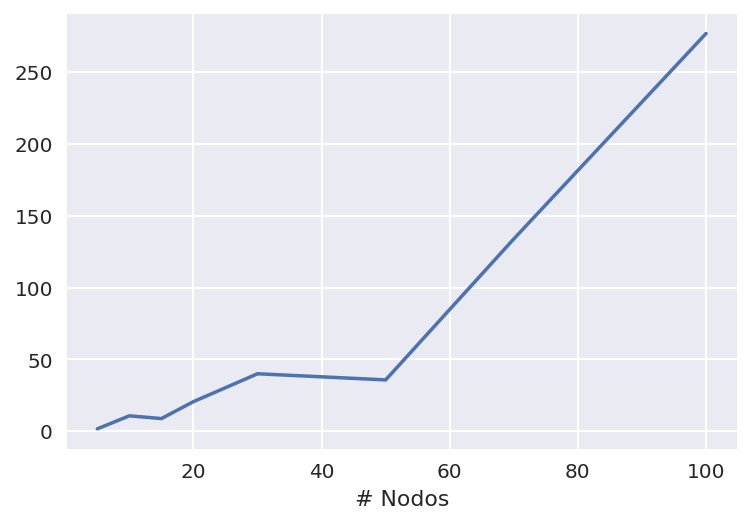

In [151]:
ga_times3.plot()

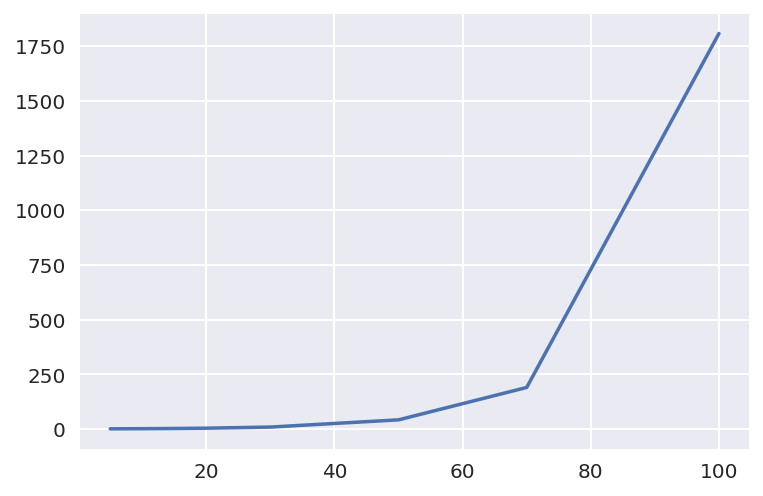

In [136]:
plt.plot(opt_times3.index, fun(opt_times3.index))

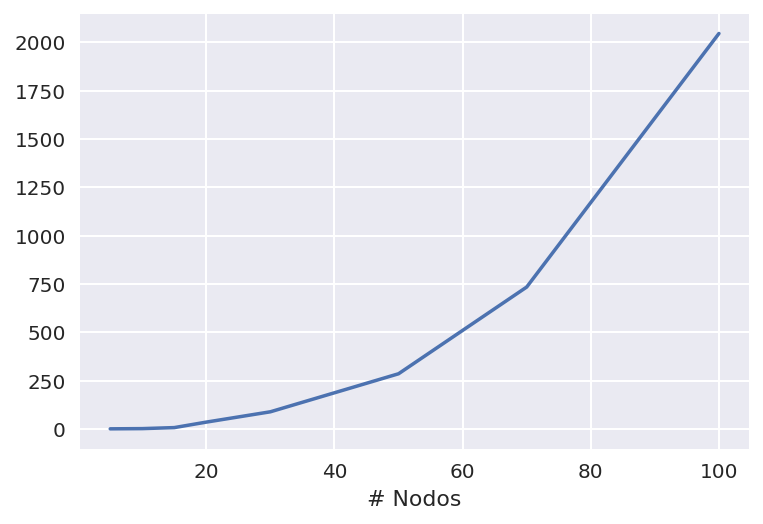

In [128]:
opt_times3.plot()

In [93]:
fun(70)

8.513096771553953e-16

In [90]:
[fun(opt_times3.index

Int64Index([5, 10, 15, 20, 30, 50, 70, 100], dtype='int64', name='# Nodos')

ValueError: x and y must have same first dimension, but have shapes (8,) and (1,)

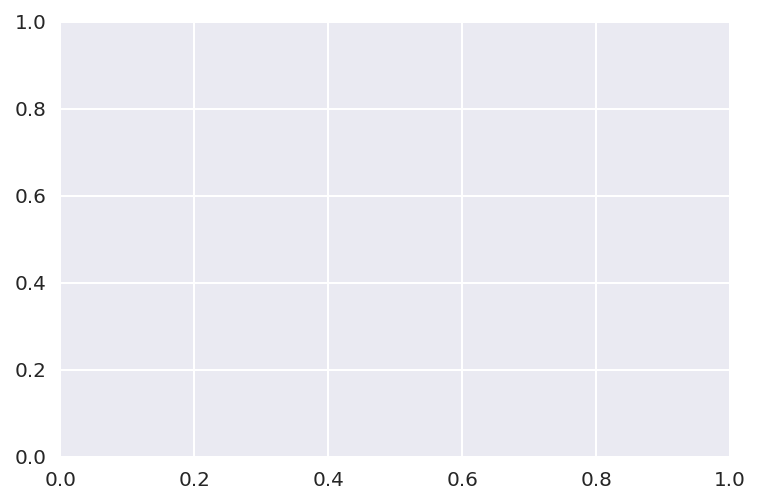

In [88]:
plt.plot(list(opt_times3.index), fun(opt_times3.index))

In [80]:
opt_times3

# Nodos
5         0.11762
10        1.23846
15        6.48149
20       34.89000
30       88.29000
50      285.00000
70      733.61000
100    2045.12000
Name: Tiempo de ejecución de Couenne, dtype: float64

In [158]:
results['Relative GAP'] = (results['Mejor valor objetivo del Algoritmo Genético'] / results['Valor objetivo de Couenne'] - 1)*100
results['Worst Relative GAP'] = (results['Peor valor objetivo del Algoritmo Genético'] / results['Valor objetivo de Couenne'] - 1)*100

In [160]:
abs(2.043506e6-1.995369e6)/(1e-10+abs(1.995369e6))

0.024124359955476907

In [159]:
results

,# Bienes,Tiempo de ejecución de Couenne,Valor objetivo de Couenne,Tiempo de ejecución del Algoritmo Genético,Mejor valor objetivo del Algoritmo Genético,Peor valor objetivo del Algoritmo Genético,Relative GAP,Worst Relative GAP
# Nodos,,,,,,,,
5,1,0.008683,4.992926e+05,0.500764,4.992926e+05,5.475538e+05,9.269312e-07,9.665900
5,3,0.117620,1.703631e+06,1.639375,1.704024e+06,1.797070e+06,2.304163e-02,5.484656
5,5,0.004097,2.959872e+06,1.307302,2.959872e+06,3.088212e+06,8.669323e-07,4.335992
5,7,0.014980,2.868928e+06,4.764459,2.869136e+06,3.108264e+06,7.235963e-03,8.342354
10,1,0.093507,3.808004e+05,1.715106,3.842015e+05,5.246851e+05,8.931362e-01,37.784812
10,3,1.238460,6.998575e+05,10.697508,7.400214e+05,1.116438e+06,5.738874e+00,59.523570
10,5,5.692530,1.917033e+06,24.606517,1.917033e+06,2.346121e+06,0.000000e+00,22.382892
10,7,73.321700,2.499959e+06,32.123035,2.622670e+06,3.128557e+06,4.908520e+00,25.144320
15,1,0.086584,2.426761e+05,0.926701,2.512914e+05,4.142801e+05,3.550132e+00,70.713179


In [12]:
results = pd.DataFrame()
results['# Nodos'] = [d['nodes'] for d in datasets]
results['# Bienes'] = [d['items'] for d in datasets]
results['Tiempo de ejecución de Couenne'] = lp_times
results['Valor objetivo de Couenne'] = lp_opts
results['Tiempo de ejecución del Algoritmo Genético'] = [np.mean(t) for t in times_200]
results['Mejor valor objetivo del Algoritmo Genético'] = [np.mean([l['Min'] for l in log[-1] \
                                    if l['gen']==max(l['gen'] for l in log[-1])][0]) \
                                    for log in logs_200]
results['Peor valor objetivo del Algoritmo Genético'] = [np.max([l['Max'] for l in log[0] \
                                    if l['gen']==0][0]) \
                                    for log in logs_200]

In [13]:
results.to_csv('datasets/resultados200.csv', index=False)

In [15]:
results.set_index('# Nodos', inplace=True)

In [65]:
results.to_csv('datasets/resultados200.csv')

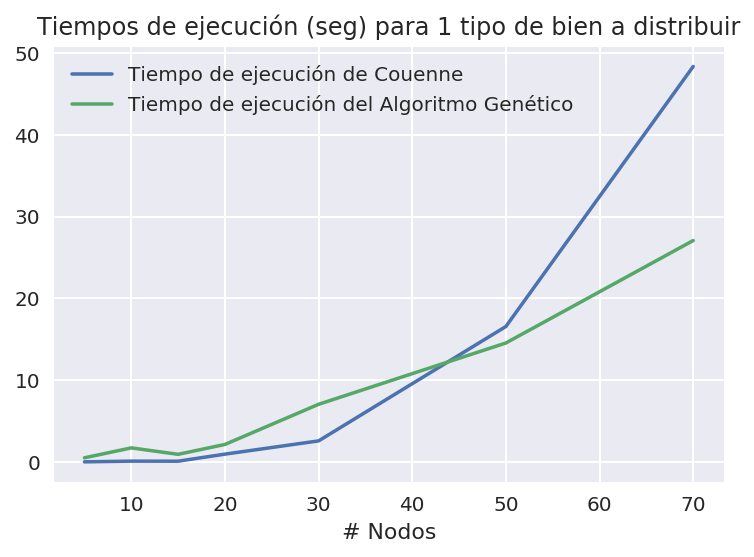

In [36]:
results[results['# Bienes']==1].loc[:80, ['Tiempo de ejecución de Couenne',
                'Tiempo de ejecución del Algoritmo Genético']].plot(
                title='Tiempos de ejecución (seg) para 1 tipo de bien a distribuir')

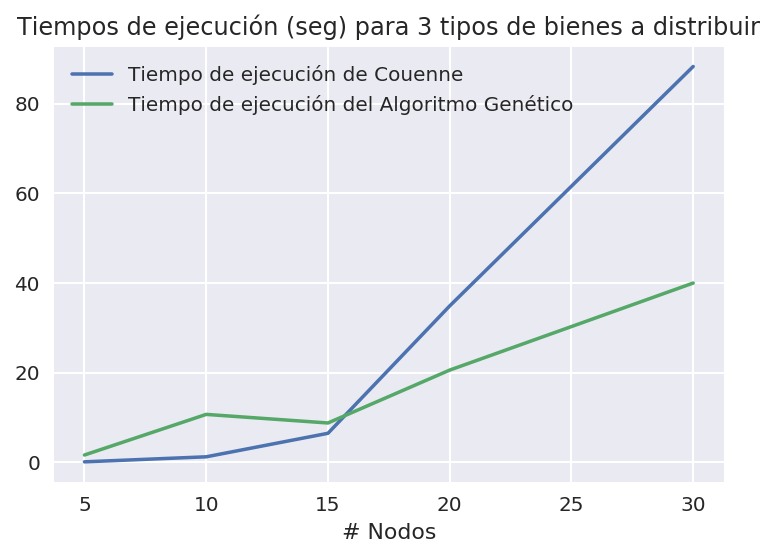

In [38]:
results[results['# Bienes']==3].loc[:40, ['Tiempo de ejecución de Couenne',
                'Tiempo de ejecución del Algoritmo Genético']].plot(
                title='Tiempos de ejecución (seg) para 3 tipos de bienes a distribuir')

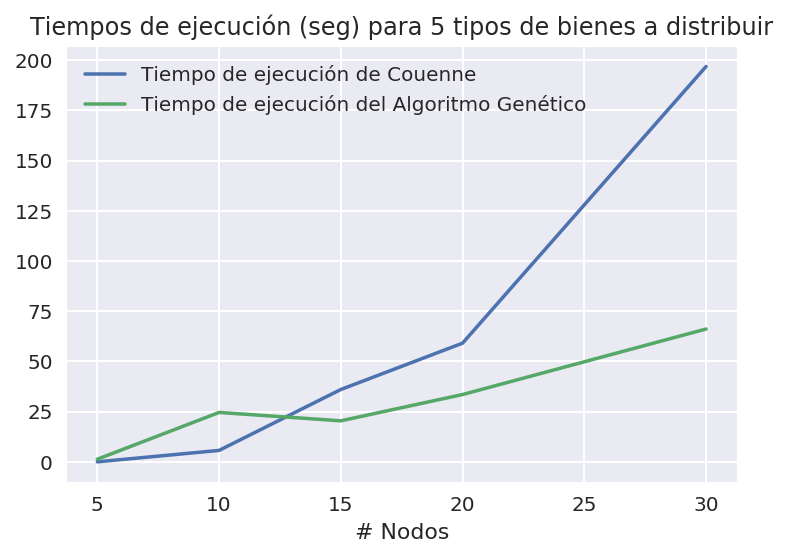

In [39]:
results[results['# Bienes']==5].loc[:30, ['Tiempo de ejecución de Couenne',
                'Tiempo de ejecución del Algoritmo Genético']].plot(
                title='Tiempos de ejecución (seg) para 5 tipos de bienes a distribuir')

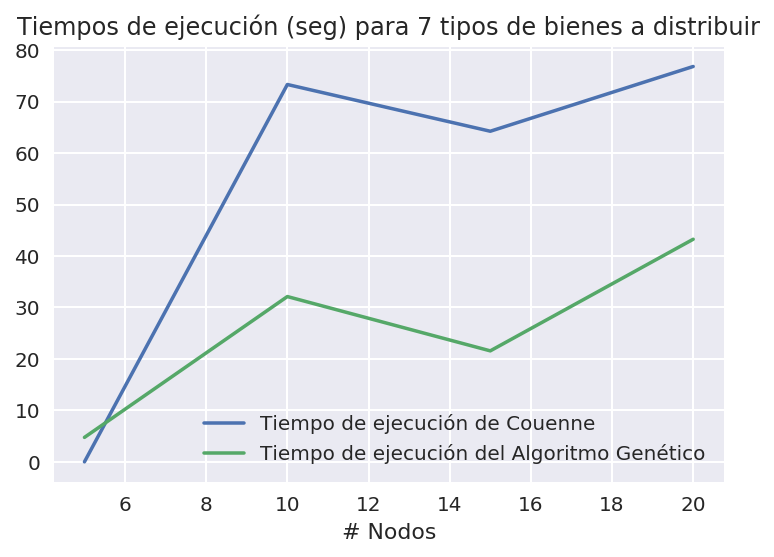

In [40]:
results[results['# Bienes']==7].loc[:20, ['Tiempo de ejecución de Couenne',
                'Tiempo de ejecución del Algoritmo Genético']].plot(
                title='Tiempos de ejecución (seg) para 7 tipos de bienes a distribuir')

## Todo

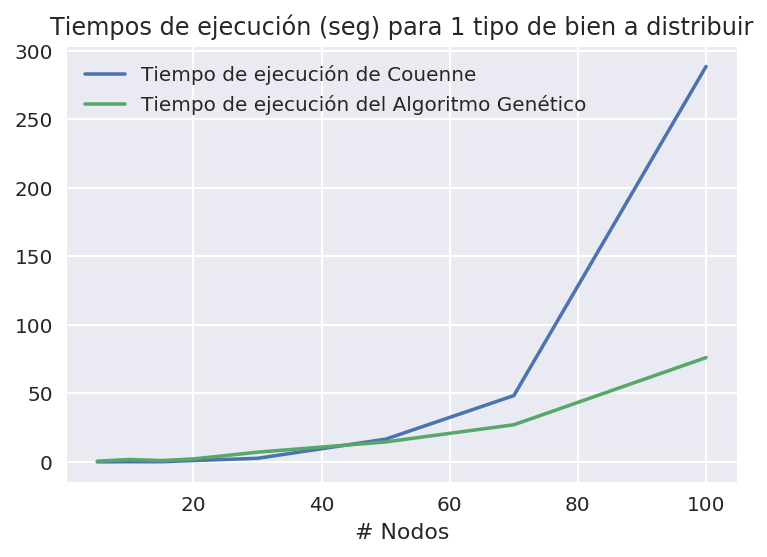

In [47]:
results[results['# Bienes']==1].loc[:, ['Tiempo de ejecución de Couenne',
                'Tiempo de ejecución del Algoritmo Genético']].plot(
                title='Tiempos de ejecución (seg) para 1 tipo de bien a distribuir')

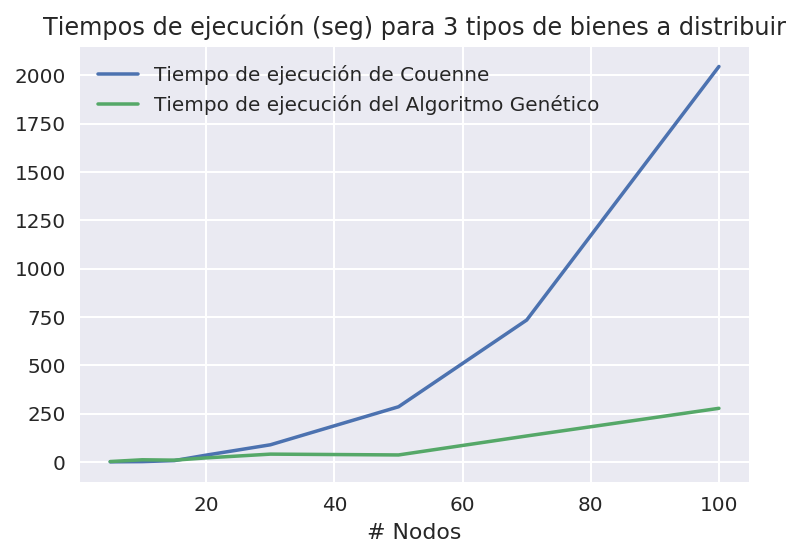

In [48]:
results[results['# Bienes']==3].loc[:, ['Tiempo de ejecución de Couenne',
                'Tiempo de ejecución del Algoritmo Genético']].plot(
                title='Tiempos de ejecución (seg) para 3 tipos de bienes a distribuir')

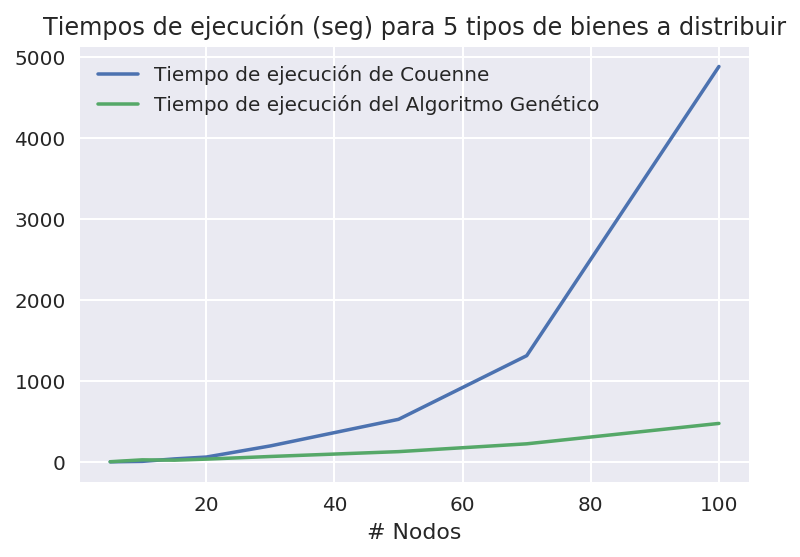

In [49]:
results[results['# Bienes']==5].loc[:, ['Tiempo de ejecución de Couenne',
                'Tiempo de ejecución del Algoritmo Genético']].plot(
                title='Tiempos de ejecución (seg) para 5 tipos de bienes a distribuir')

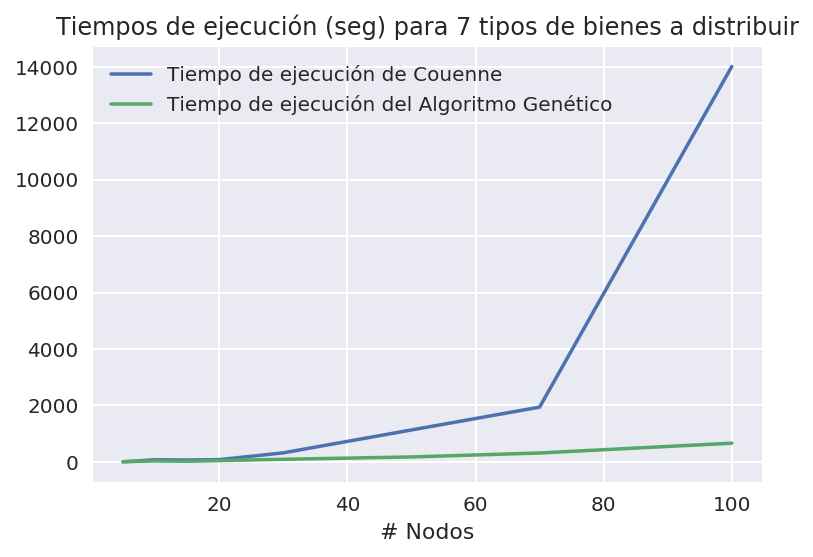

In [50]:
results[results['# Bienes']==7].loc[:, ['Tiempo de ejecución de Couenne',
                'Tiempo de ejecución del Algoritmo Genético']].plot(
                title='Tiempos de ejecución (seg) para 7 tipos de bienes a distribuir')

## Optimalidad

In [51]:
results.columns

Index(['# Bienes', 'Tiempo de ejecución de Couenne',
       'Valor objetivo de Couenne',
       'Tiempo de ejecución del Algoritmo Genético',
       'Mejor valor objetivo del Algoritmo Genético',
       'Peor valor objetivo del Algoritmo Genético'],
      dtype='object')

In [59]:
results['Valor objetivo de Couenne'] = np.min([results['Valor objetivo de Couenne'], 
                                               results['Mejor valor objetivo del Algoritmo Genético']], axis=0)

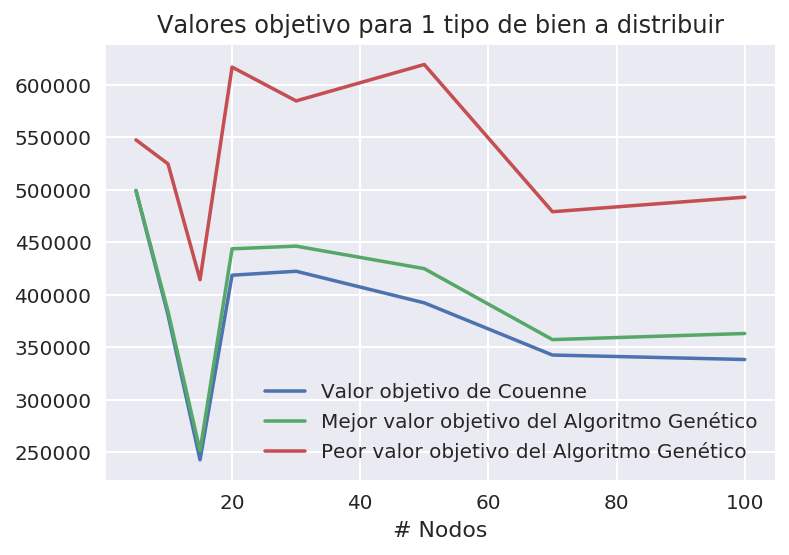

In [60]:
results[results['# Bienes']==1].loc[:, ['Valor objetivo de Couenne',
                'Mejor valor objetivo del Algoritmo Genético',
                'Peor valor objetivo del Algoritmo Genético']].plot(
                title='Valores objetivo para 1 tipo de bien a distribuir')

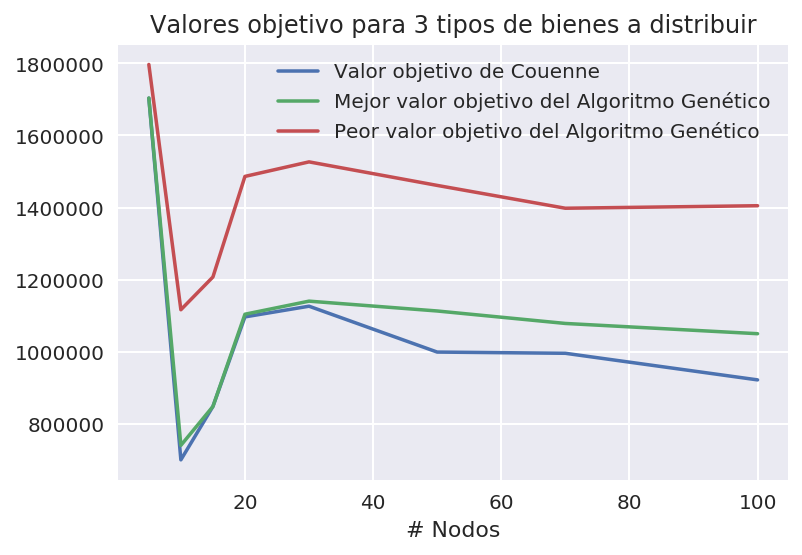

In [61]:
results[results['# Bienes']==3].loc[:, ['Valor objetivo de Couenne',
                'Mejor valor objetivo del Algoritmo Genético',
                'Peor valor objetivo del Algoritmo Genético']].plot(
                title='Valores objetivo para 3 tipos de bienes a distribuir')

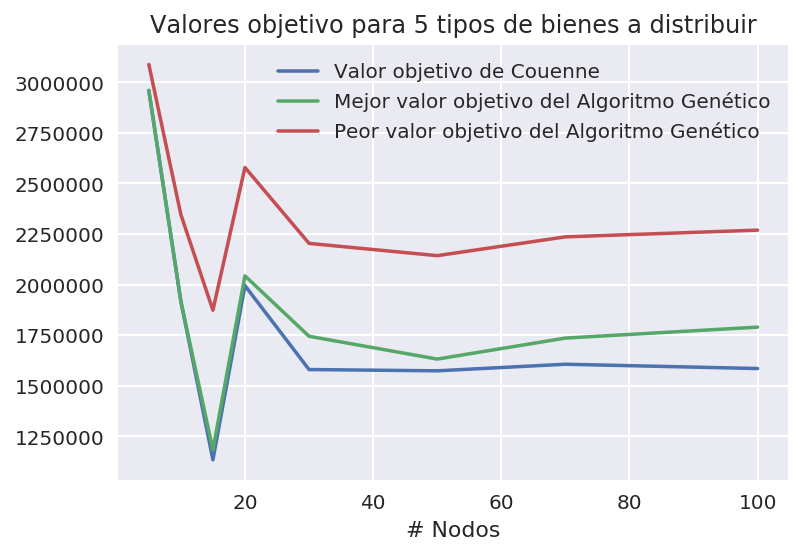

In [62]:
results[results['# Bienes']==5].loc[:, ['Valor objetivo de Couenne',
                'Mejor valor objetivo del Algoritmo Genético',
                'Peor valor objetivo del Algoritmo Genético']].plot(
                title='Valores objetivo para 5 tipos de bienes a distribuir')

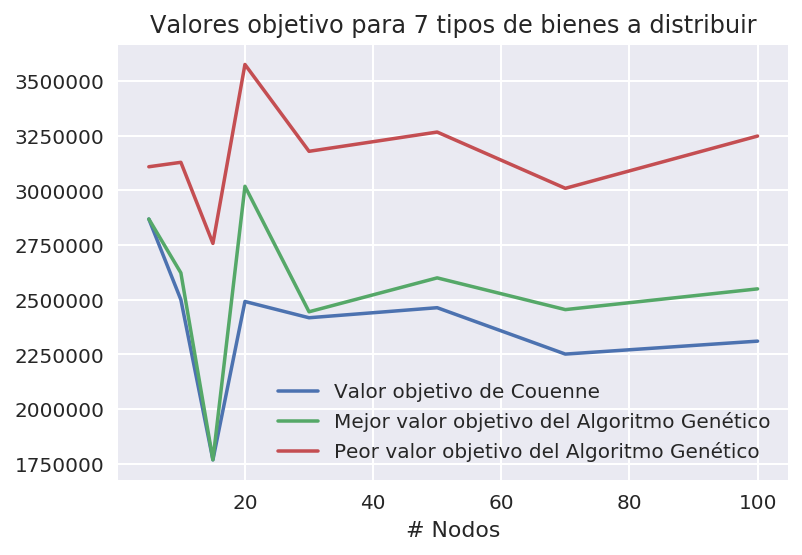

In [64]:
results[results['# Bienes']==7].loc[:, ['Valor objetivo de Couenne',
                'Mejor valor objetivo del Algoritmo Genético',
                'Peor valor objetivo del Algoritmo Genético']].plot(
                title='Valores objetivo para 7 tipos de bienes a distribuir')

## Pruebas de hipótesis

In [52]:
from scipy import stats
shapiro = []
ttest = []
for d,t,lt in zip(datasets, times_200, lp_times):
    print(d['nodes'], 'nodes', d['items'], 'items')
    shapiro.append(stats.shapiro(t)[1])
    ttest.append(stats.ttest_ind(t, [lt]*10)[1])
    print('Shapiro-wilk test p-value:', shapiro[-1])
    print('t-test p-value:', ttest[-1])
    print()

In [10]:
logs = []
times = []
n_runs = 10
for dataset in datasets:
    print(f'{dataset["nodes"]} nodes {dataset["items"]} items: |', end=' ')
    runs_logs = []
    runs_times = []
    for run in range(n_runs):
        start = time.time()
        _, _, log = run_singleobjective_GA(dataset['n_nodes'], dataset['supplies'],
                            dataset['demands'], dataset['costs'],
                            dataset['capacities'], pop_size=100, n_generations=100,
                            n_solutions=10, crossover_p=0.5, mutation_p=0.2,
                            early_stopping_rounds=20, verbose=False)
        end = time.time()
        runs_logs.append(log)
        runs_times.append(end-start)
    print(f'Avg time: {np.mean(runs_times):.4f}s Best opt value: {np.min([log[-1]["Min"] for log in runs_logs])}')
    logs.append(runs_logs)
    times.append(runs_times)
# 0.5893 3.7086 4.4684 11.0034 3.7167

5 nodes 1 items: | Avg time: 0.3951s Best opt value: 499292.64462809917
5 nodes 3 items: | Avg time: 1.4145s Best opt value: 1703631.2032923158
5 nodes 5 items: | Avg time: 1.3513s Best opt value: 2959872.225660088
5 nodes 7 items: | Avg time: 3.9177s Best opt value: 2868928.1355782975
10 nodes 1 items: | Avg time: 1.1269s Best opt value: 383832.4876033058
10 nodes 3 items: | Avg time: 7.0976s Best opt value: 720340.4290351742
10 nodes 5 items: | Avg time: 12.6952s Best opt value: 1906146.8149032404
10 nodes 7 items: | Avg time: 15.9242s Best opt value: 2605753.7769589317
15 nodes 1 items: | Avg time: 1.1210s Best opt value: 251046.19473140495
15 nodes 3 items: | Avg time: 6.3266s Best opt value: 826482.375274129
15 nodes 5 items: | Avg time: 13.2368s Best opt value: 1181739.9698922578
15 nodes 7 items: | Avg time: 20.3074s Best opt value: 1764137.9679772842
20 nodes 1 items: | Avg time: 2.1866s Best opt value: 443748.4242882338
20 nodes 3 items: | Avg time: 10.6612s Best opt value: 10

In [10]:
%%time
dataset = datasets[25]
pop, hof, log = run_singleobjective_GA(dataset['n_nodes'], dataset['supplies'],
                        dataset['demands'], dataset['costs'],
                        dataset['capacities'], pop_size=100, n_generations=300,
                        n_solutions=20, crossover_p=0.5, mutation_p=0.2,
                        early_stopping_rounds=20)

gen	nevals	Avg        	Std    	Min        	Max        
0  	100   	1.30404e+06	37910.7	1.23054e+06	1.41127e+06
1  	69    	1.24404e+06	10483.8	1.23054e+06	1.2798e+06 
2  	61    	1.22668e+06	10419.8	1.1971e+06 	1.23722e+06
3  	77    	1.19961e+06	6938   	1.19003e+06	1.22392e+06
4  	70    	1.19101e+06	2565.77	1.18875e+06	1.1971e+06 
5  	64    	1.18786e+06	2424.71	1.17999e+06	1.19003e+06
6  	68    	1.18096e+06	2468.34	1.17837e+06	1.18688e+06
7  	67    	1.1787e+06 	622.915	1.17832e+06	1.17999e+06
8  	73    	1.17778e+06	812.457	1.17487e+06	1.17837e+06
9  	74    	1.17543e+06	1252.44	1.1732e+06 	1.17764e+06
10 	68    	1.17284e+06	1022.79	1.17032e+06	1.17487e+06
11 	72    	1.17005e+06	614.065	1.16865e+06	1.17032e+06
12 	74    	1.16862e+06	549.529	1.1669e+06 	1.17032e+06
13 	70    	1.16643e+06	1603.44	1.16383e+06	1.16865e+06
14 	66    	1.16312e+06	2132.4 	1.15716e+06	1.16507e+06
15 	76    	1.15809e+06	1542.72	1.15702e+06	1.16383e+06
16 	74    	1.15681e+06	1000.52	1.15286e+06	1.15716e+06
17 	70    

In [14]:
import pickle
with open('datasets/GA_logs.pkl', 'wb') as f:
    pickle.dump(logs, f, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:
import pickle
with open('datasets/GA_times.pkl', 'wb') as f:
    pickle.dump(times, f, protocol=pickle.HIGHEST_PROTOCOL)

In [64]:
datasets[25]['nodes'], datasets[25]['items']

(70, 3)

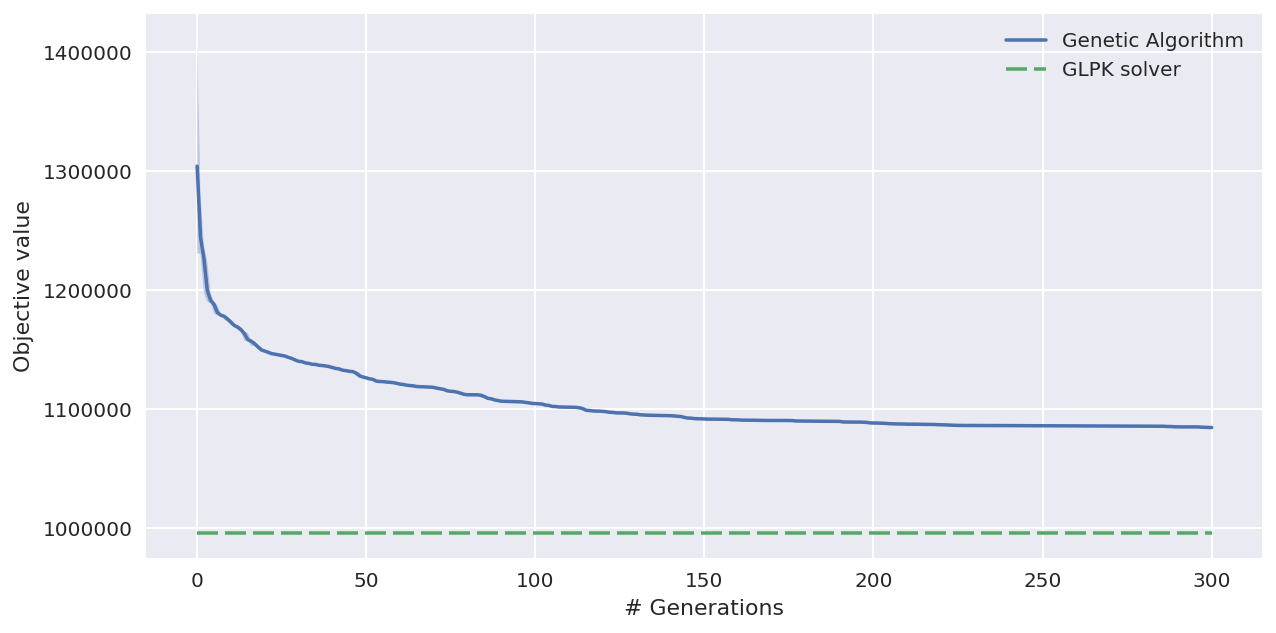

In [14]:
from utils import plot_log
plot_log(log, min_max=True, optimal_value=995565.7)

## Process data

In [159]:
lp_times = [0.008683, 0.11762, 0.004097, 0.01498, 
           0.093507, 1.23846, 5.69253, 73.3217,
           0.086584, 6.48149, 36.03, 64.24,
           0.950327, 34.89, 59.12, 76.82,
           2.57049, 88.29, 196.91, 318.64,
           16.565, 285.00, 525.62, 1130.16,
           48.3724, 733.61, 1312.68, 1939.96,
           288.70, 2045.12, 4887.99, 14018.52]
lp_opts = [499292.64, 1703631.203292316, 2959872.2, 2868928.135578291,
          380800.3966942149, 699857.4897937207, 1922668.411017489, 2499959.2,
          242676.1158587367, 873510.9743251393, 1134136.7, 1862396.7,
          418605.8909045099, 1096563.1, 1995369.1, 2491801,
          422356.7763972118, 1126224.3, 1580413.7, 2417517,
          392256.9256482316, 998924.96, 1574122.5, 2463475.4,
          342532.3847513397, 995572.95, 1606624.1, 2251286.2,
          338277.44, 921732.25, 1585387.9, 2310516.7]

In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [211]:
results = pd.DataFrame()

In [212]:
results['Nodes'] = [d['nodes'] for d in datasets]
results['Items'] = [d['items'] for d in datasets]
results['Solver execution time'] = lp_times
results['Solver optimal value'] = lp_opts
results['GA execution time'] = [np.mean(t) for t in times]
results['GA optimal value'] = [np.mean([l['Min'] for l in log[-1] \
                                    if l['gen']==max(l['gen'] for l in log[-1])][0]) \
                                    for log in logs]
results['GA worst value'] = [np.max([l['Max'] for l in log[0] \
                                    if l['gen']==0][0]) \
                                    for log in logs]

In [201]:
results

,Nodes,Items,Solver execution time,Solver optimal value,GA execution time,GA optimal value,GA worst value
0,5,1,0.008683,4.992926e+05,0.395132,4.992926e+05,5.475538e+05
1,5,3,0.117620,1.703631e+06,1.414484,1.705577e+06,1.807998e+06
2,5,5,0.004097,2.959872e+06,1.351305,2.959872e+06,3.083301e+06
3,5,7,0.014980,2.868928e+06,3.917711,2.869136e+06,3.089818e+06
4,10,1,0.093507,3.808004e+05,1.126851,3.841745e+05,5.323176e+05
5,10,3,1.238460,6.998575e+05,7.097628,7.346914e+05,1.103554e+06
6,10,5,5.692530,1.922668e+06,12.695156,1.913445e+06,2.354163e+06
7,10,7,73.321700,2.499959e+06,15.924210,2.656643e+06,3.077282e+06
8,15,1,0.086584,2.426761e+05,1.120991,2.518594e+05,4.212994e+05
9,15,3,6.481490,8.735110e+05,6.326564,8.450230e+05,1.225534e+06


In [196]:
results.sort_values(['Items', 'Nodes'])

,Items,Solver execution time,Solver optimal value,GA execution time,GA optimal value,GA worst value,Nodes
Nodes,,,,,,,
5,1,0.008683,4.992926e+05,0.395132,4.992926e+05,5.475538e+05,5
10,1,0.093507,3.808004e+05,1.126851,3.841745e+05,5.323176e+05,10
15,1,0.086584,2.426761e+05,1.120991,2.518594e+05,4.212994e+05,15
20,1,0.950327,4.186059e+05,2.186622,4.545008e+05,6.257299e+05,20
30,1,2.570490,4.223568e+05,5.434629,4.396032e+05,5.676364e+05,30
50,1,16.565000,3.922569e+05,9.920777,4.117357e+05,6.384985e+05,50
70,1,48.372400,3.425324e+05,19.086057,3.668041e+05,4.913128e+05,70
100,1,288.700000,3.382774e+05,47.047506,3.716740e+05,5.079464e+05,100
5,3,0.117620,1.703631e+06,1.414484,1.705577e+06,1.807998e+06,5


In [216]:
results['Solver optimal value'] = np.min([results['Solver optimal value'], results['GA optimal value']], axis=0)

In [97]:
results.to_csv('datasets/results.csv', index=False)

In [218]:
results.set_index('Nodes', inplace=True)

## Tiempos de ejecución

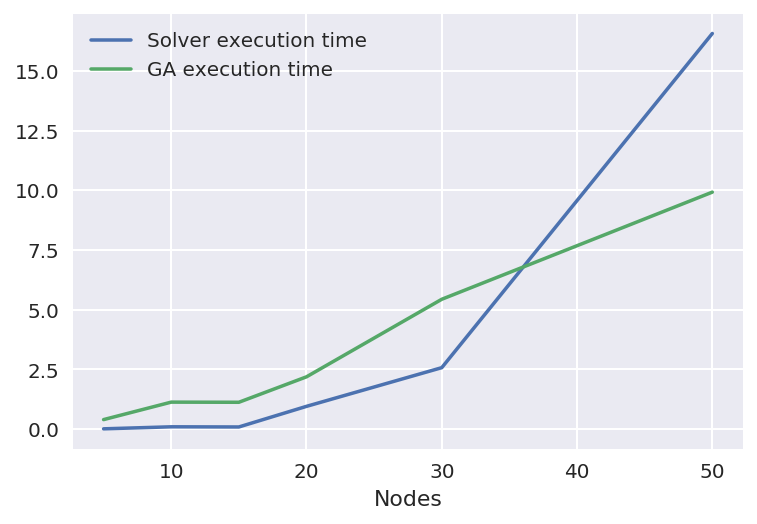

In [206]:
results[results.Items==1].loc[:60, ['Solver execution time',
                           'GA execution time']].plot()

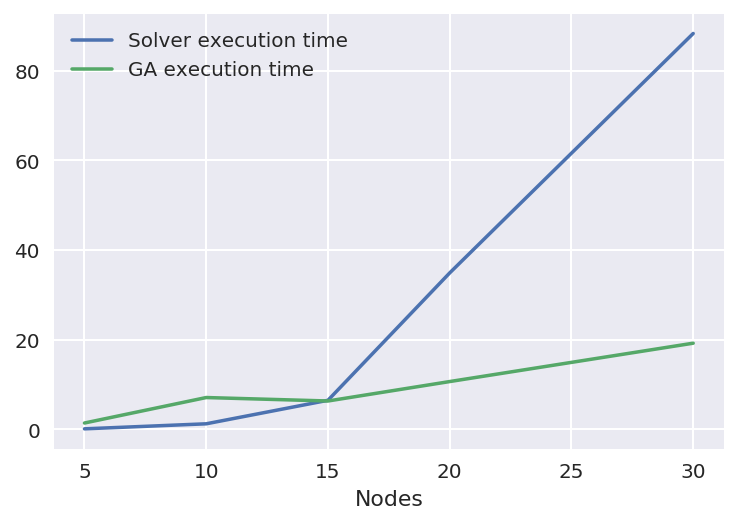

In [207]:
results[results.Items==3].loc[:30, ['Solver execution time',
                           'GA execution time']].plot()

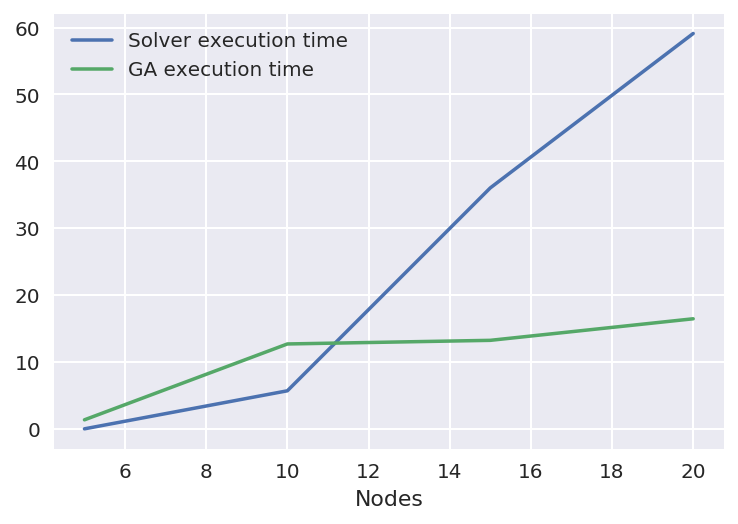

In [51]:
results[results.Items==5].loc[:20, ['Solver execution time',
                           'GA execution time']].plot()

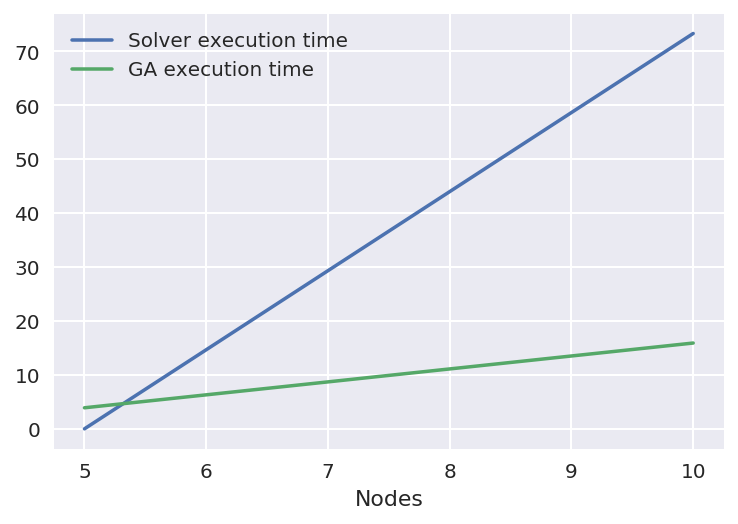

In [62]:
results[results.Items==7].loc[:10, ['Solver execution time',
                           'GA execution time']].plot()

## Optimal value

In [84]:
results['Optimal value diff'] = results['GA optimal value'] - results['Solver optimal value']

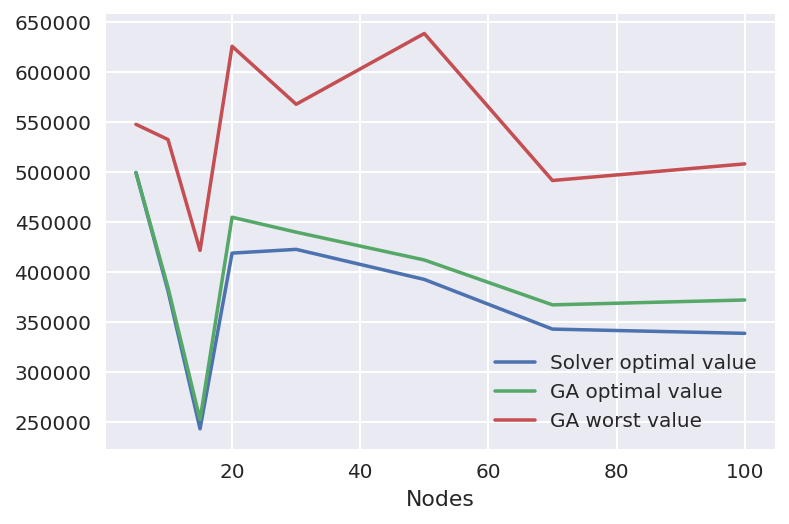

In [219]:
results[results.Items==1].loc[:, ['Solver optimal value',
                           'GA optimal value', 'GA worst value']].plot()

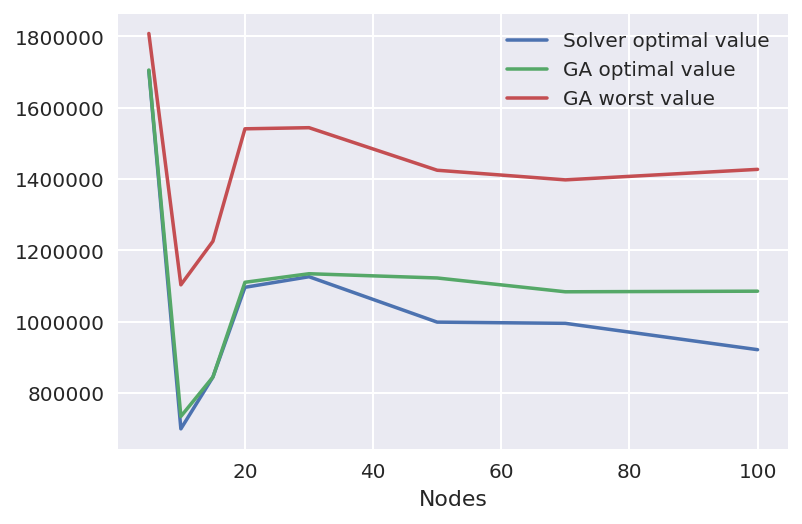

In [220]:
results[results.Items==3].loc[:, ['Solver optimal value',
                           'GA optimal value', 'GA worst value']].plot()

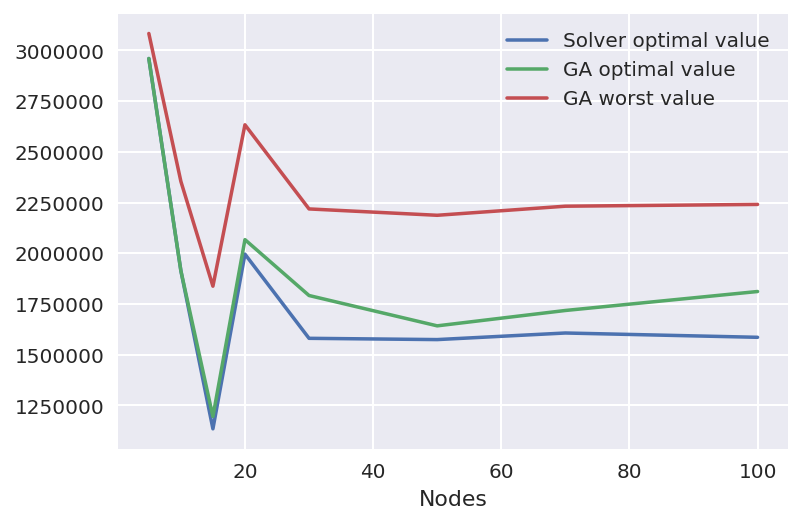

In [221]:
results[results.Items==5].loc[:, ['Solver optimal value',
                           'GA optimal value', 'GA worst value']].plot()

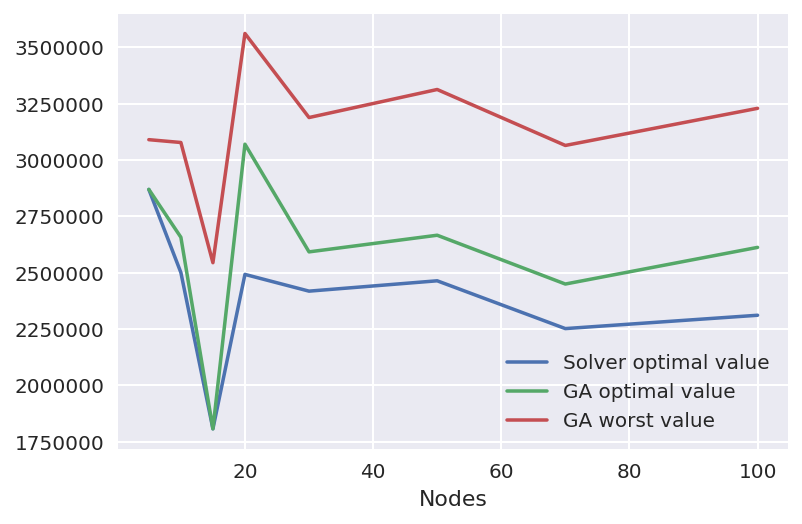

In [222]:
results[results.Items==7].loc[:, ['Solver optimal value',
                           'GA optimal value', 'GA worst value']].plot()

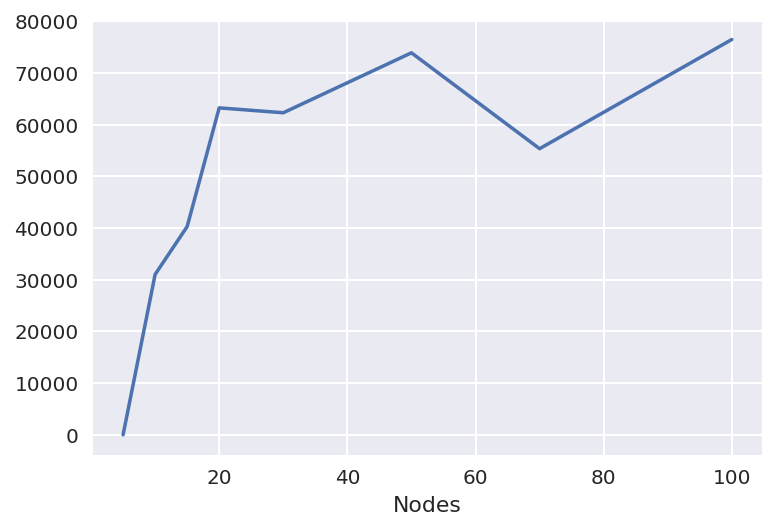

In [69]:
results[results.Items==1].loc[:, 'Optimal value diff'].plot()

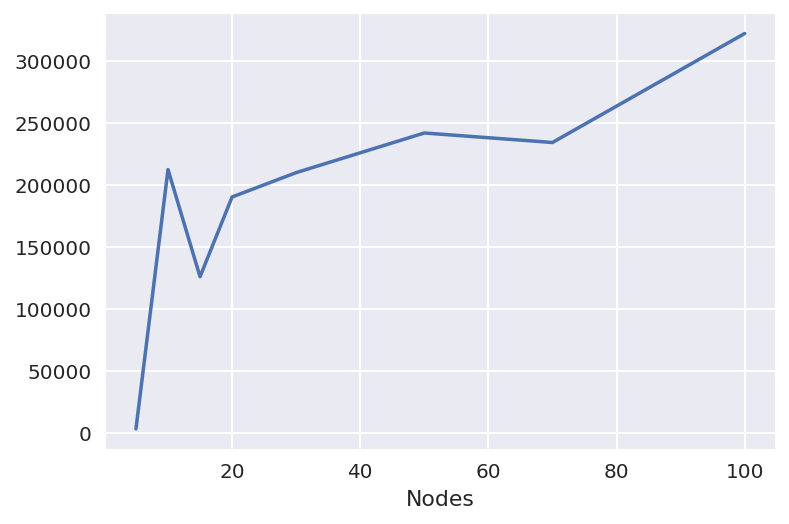

In [70]:
results[results.Items==3].loc[:, 'Optimal value diff'].plot()

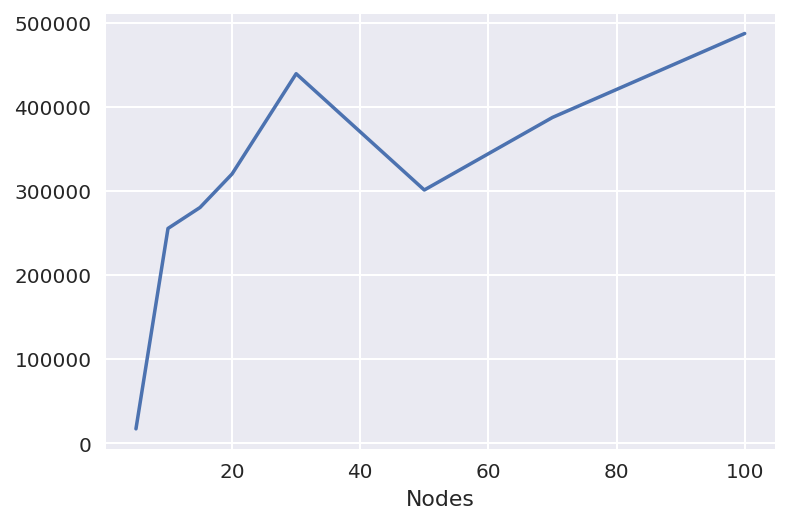

In [71]:
results[results.Items==5].loc[:, 'Optimal value diff'].plot()

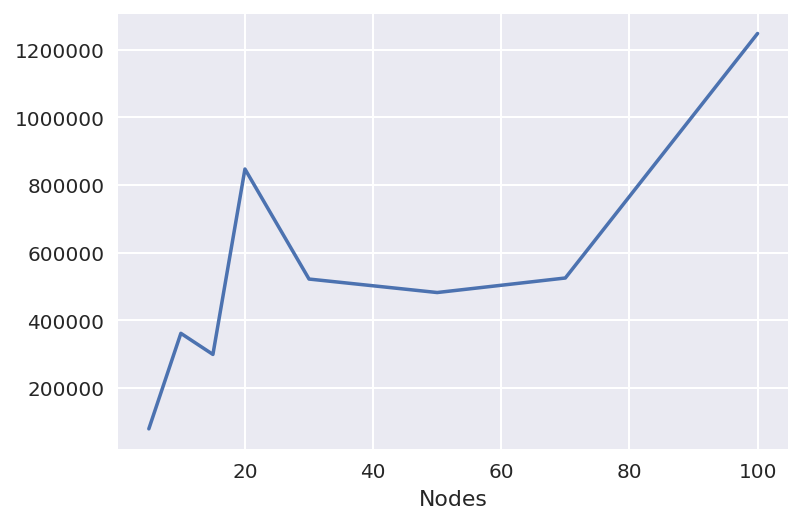

In [85]:
results[results.Items==7].loc[:, 'Optimal value diff'].plot()

## Hypothesis testing

In [109]:
from scipy import stats
shapiro = []
ttest = []
for d,t,lt in zip(datasets, times, lp_times):
    print(d['nodes'], 'nodes', d['items'], 'items')
    shapiro.append(stats.shapiro(t)[1])
    ttest.append(stats.ttest_ind(t, [lt]*10)[1])
    print('Shapiro-wilk test p-value:', shapiro[-1])
    print('t-test p-value:', ttest[-1])
    print()

5 nodes 1 items
Shapiro-wilk test p-value: 0.013422396034002304
t-test p-value: 1.0777893969232736e-14

5 nodes 3 items
Shapiro-wilk test p-value: 0.14056412875652313
t-test p-value: 5.475530921846218e-10

5 nodes 5 items
Shapiro-wilk test p-value: 0.055137090384960175
t-test p-value: 3.132297355886955e-09

5 nodes 7 items
Shapiro-wilk test p-value: 0.06920924782752991
t-test p-value: 2.4600077980101345e-09

10 nodes 1 items
Shapiro-wilk test p-value: 0.35865917801856995
t-test p-value: 4.3655299291884047e-10

10 nodes 3 items
Shapiro-wilk test p-value: 0.0013818993465974927
t-test p-value: 8.91483992809655e-11

10 nodes 5 items
Shapiro-wilk test p-value: 0.36552464962005615
t-test p-value: 5.366736618387988e-31

10 nodes 7 items
Shapiro-wilk test p-value: 3.258822107454762e-05
t-test p-value: 3.1254472143682317e-25

15 nodes 1 items
Shapiro-wilk test p-value: 0.10110927373170853
t-test p-value: 6.636814914313246e-10

15 nodes 3 items
Shapiro-wilk test p-value: 0.0010451566195115447
t-

In [110]:
results = pd.DataFrame()

In [111]:
results['Nodes'] = [d['nodes'] for d in datasets]
results['Items'] = [d['items'] for d in datasets]
results['Solver execution time'] = lp_times
results['Solver optimal value'] = lp_opts
results['GA execution time'] = [np.mean(t) for t in times]
results['GA optimal value'] = [np.mean([l['Min'] for l in log[-1] \
                                    if l['nevals']==100][0]) \
                                    for log in logs]
results['Shapiro-Wilk p-value'] = shapiro
results['t-test p-value'] = ttest

In [114]:
shapiro_map = results.pivot_table('Shapiro-Wilk p-value', 'Nodes', 'Items')

In [115]:
ttest_map = results.pivot_table('t-test p-value', 'Nodes', 'Items')

In [148]:
ttest_map

Items,1,3,5,7
Nodes,,,,
5,1.077789e-14,5.475531e-10,3.132297e-09,2.460008e-09
10,4.365530e-10,8.914840e-11,5.366737e-31,3.125447e-25
15,6.636815e-10,8.351702e-01,1.522050e-11,4.542308e-16
20,1.980905e-06,1.056568e-21,7.596320e-24,5.052949e-28
30,7.540662e-04,3.665169e-21,3.546108e-40,4.022588e-46
50,7.449116e-06,1.332169e-24,1.929495e-26,2.022482e-40
70,3.519017e-11,1.322282e-30,2.519614e-37,3.416235e-34
100,9.961888e-25,1.237454e-59,4.102700e-59,1.488742e-63


In [161]:
rel_gap = results.pivot_table('Relative GAP', '# Nodos', '# Bienes')

In [163]:
worst_rel_gap = results.pivot_table('Worst Relative GAP', '# Nodos', '# Bienes')

In [178]:
rel_gap_labels = np.array([[f'{x:.2f}%' for x in row] for row in rel_gap.values])

In [180]:
rel_gap_labels

array([['0.00%', '0.02%', '0.00%', '0.01%'],
       ['0.89%', '5.74%', '0.00%', '4.91%'],
       ['3.55%', '0.00%', '4.36%', '0.00%'],
       ['6.01%', '0.68%', '2.41%', '21.15%'],
       ['5.66%', '1.25%', '10.41%', '1.13%'],
       ['8.31%', '11.42%', '3.68%', '5.54%'],
       ['4.29%', '8.32%', '8.05%', '9.04%'],
       ['7.32%', '13.91%', '12.91%', '10.35%']], dtype='<U6')

Text(0.5,1,'Diferencia relativa entre valores objetivo (%)')

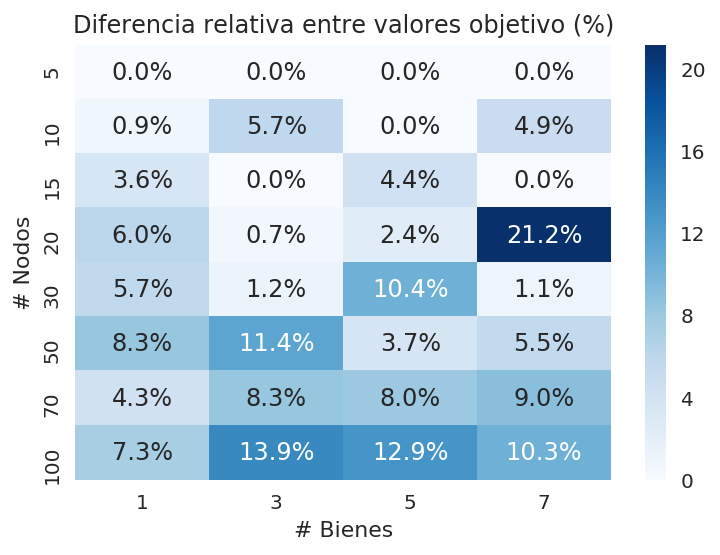

In [189]:
rel_gap_labels = np.array([[f'{x:.1f}%' for x in row] for row in rel_gap.values])
sns.heatmap(rel_gap, cmap='Blues', annot=rel_gap_labels, fmt='')
plt.title('Diferencia relativa entre valores objetivo (%)')

Text(0.5,1,'Diferencia relativa entre valores objetivo (%)')

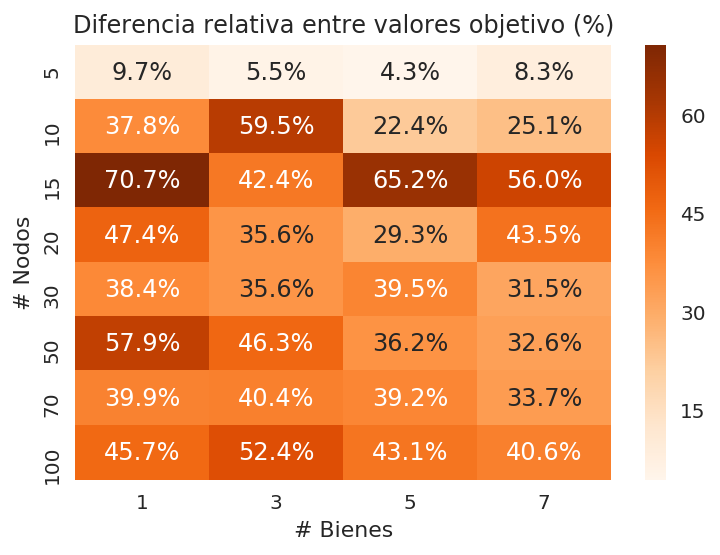

In [190]:
worst_rel_gap_labels = np.array([[f'{x:.1f}%' for x in row] for row in worst_rel_gap.values])
sns.heatmap(worst_rel_gap, cmap='Oranges', annot=worst_rel_gap_labels, fmt="")
plt.title('Diferencia relativa entre valores objetivo (%)')

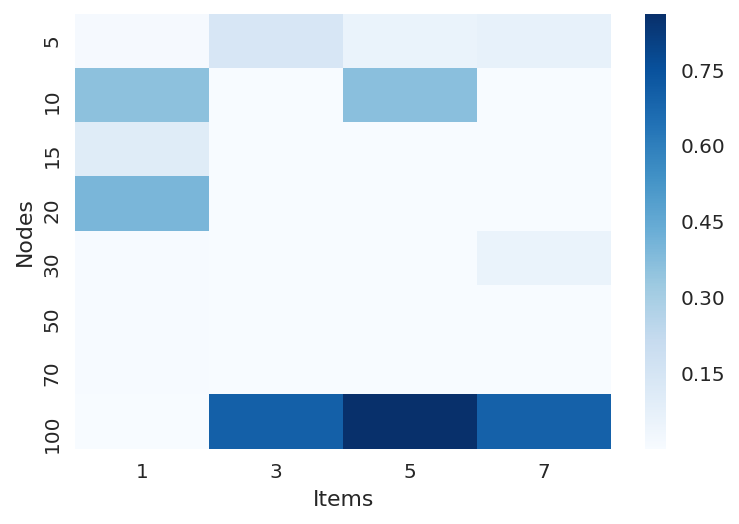

In [117]:
sns.heatmap(shapiro_map, cmap='Blues')

In [125]:
np.log(8) / np.log(2)

3.0

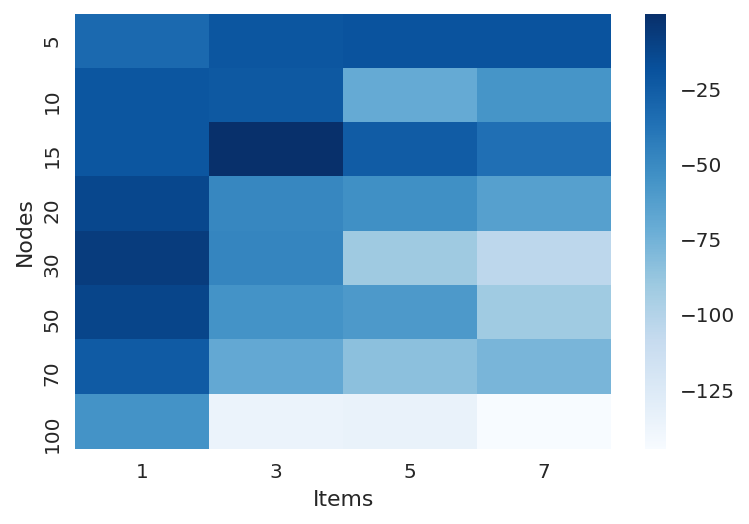

In [139]:
sns.heatmap(np.log(ttest_map), cmap='Blues')

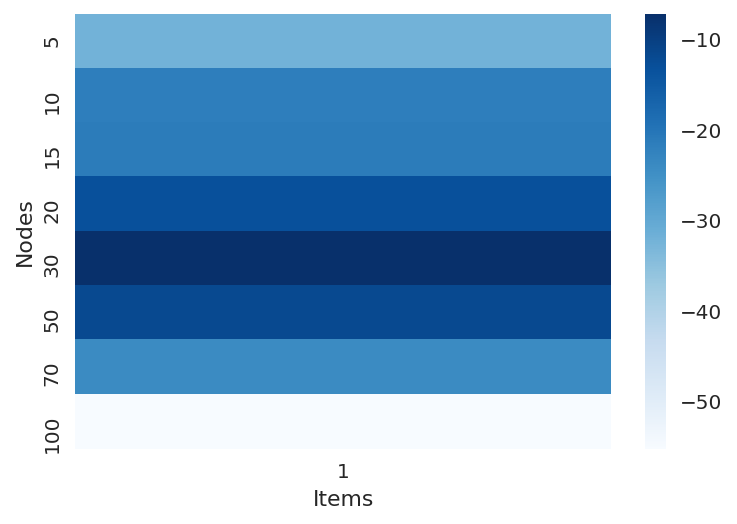

In [144]:
sns.heatmap(np.log(ttest_map).iloc[:,0:1], cmap='Blues')

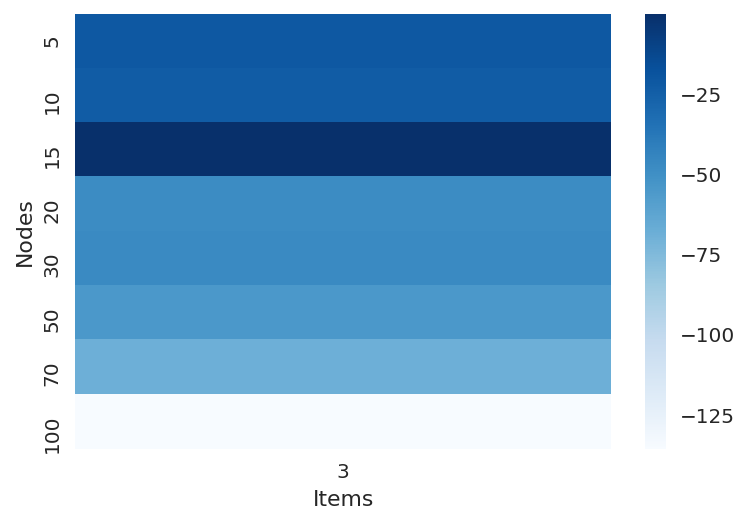

In [145]:
sns.heatmap(np.log(ttest_map).iloc[:,1:2], cmap='Blues')

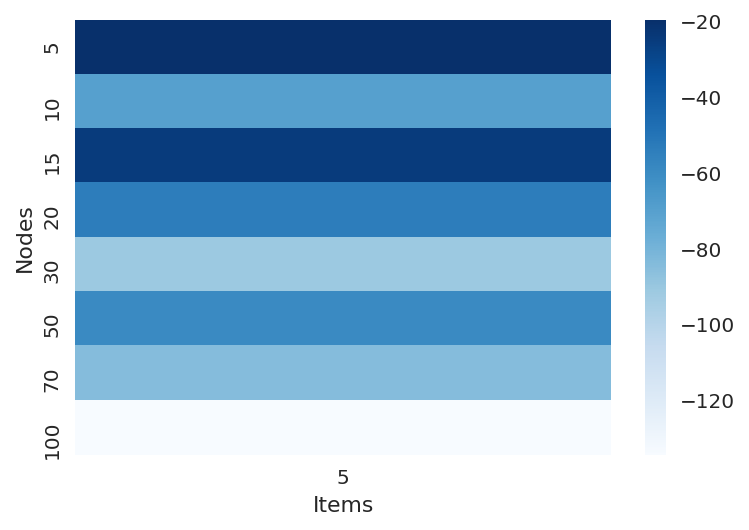

In [146]:
sns.heatmap(np.log(ttest_map).iloc[:,2:3], cmap='Blues')

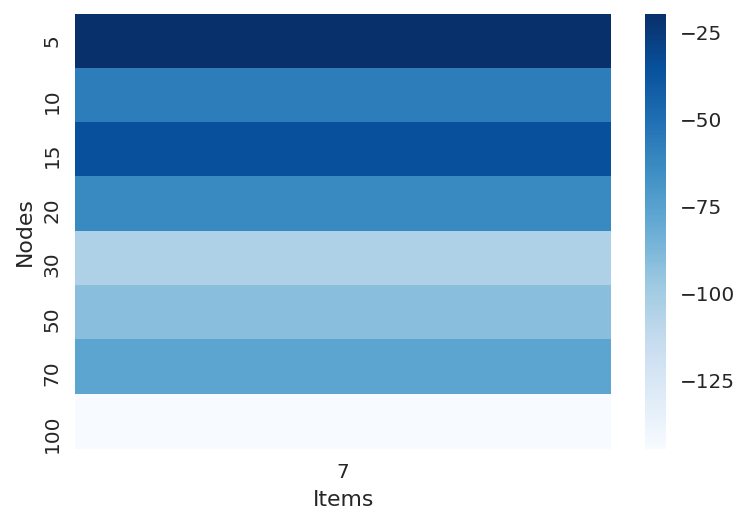

In [147]:
sns.heatmap(np.log(ttest_map).iloc[:,3:4], cmap='Blues')